In [1]:
import numpy as np
import time

In [2]:
#test array
A = np.random.randint(0,100,10)

In [3]:
A

array([18, 70, 99, 95, 33, 96, 48,  6,  9, 80])

In [4]:
#Insertion Sort
def insertion_sort(Arr):
  for j in range(len(Arr)):
      key = Arr[j]
      # insert A[j] into sorted sequence A[0..j-1]
      i = j-1
      while i>-1 and Arr[i]>key:
          Arr[i+1] = Arr[i]
          i = i-1
      Arr[i+1] = key
  return Arr

In [5]:
#Merge Sort
def merge_sort(Arr):
  n = len(Arr)
  if n==1: 
      return Arr
  mid = n//2     # floor division
  #print('before call',A[:mid],A[mid:])
  L = merge_sort(Arr[:mid])
  R = merge_sort(Arr[mid:])
  #print('after call',L,R)
  return np.asarray(merge(L,R))

def merge(L,R):
  #print('Start',L,R)
  i = 0
  j = 0
  answer = []
  while i<len(L) and j<len(R):
      if L[i]<R[j]:
          answer.append(L[i])
          i += 1
      else:
          answer.append(R[j])
          j += 1
  if i<len(L):
      #print('before extend,i',answer)
      answer.extend(L[i:])
      #print('after extend,i',answer)
  if j<len(R):
      #print('before extend,j',answer)
      answer.extend(R[j:])
      #print('after extend,j',answer)
  return answer

In [6]:
#Heap Sort
def max_heapify(arr, n, i): 
    largest = i # set largest as root
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if (l < n and arr[i] < arr[l]): 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if (r < n and arr[largest] < arr[r]): 
        largest = r 
  
    # Change root, if needed 
    if (largest != i):
        #print('swap',largest,i)
        arr[i],arr[largest] = arr[largest],arr[i] # swap 
  
        # Heapify the root. 
        max_heapify(arr, n, largest) 
  
# function to sort an array of given size 
def heap_sort(arr): 
    n = len(arr) 
  
    # Build a heap. 
    for i in range(int((n-1)/2), -1, -1):
        #print('before',arr,i)
        max_heapify(arr, n, i)
        #print('after',arr,i)
 
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        #print('before push',arr,i)
        arr[i], arr[0] = arr[0], arr[i] # swap
        #print('after push',arr,i)
        #print('before',arr,i)
        max_heapify(arr, i, 0)
        #print('after',arr,i)

    return arr

In [7]:
#Test basic running
print(A)
print(heap_sort(A))
print(insertion_sort(A),merge_sort(A))

[18 70 99 95 33 96 48  6  9 80]
[ 6  9 18 33 48 70 80 95 96 99]
[ 6  9 18 33 48 70 80 95 96 99] [ 6  9 18 33 48 70 80 95 96 99]


In [8]:
#Performance plots
def method(method,size,max_input_size):
  variants = len(range(10,max_input_size,1))
  B = np.zeros((variants,size))
  #Plot performance of binary search
  for i in range(size-1):
    count = 0
    for n in range(10,max_input_size,1):
      A = np.random.randint(0,100,n)
      start = time.time()
      method(A)
      end = time.time()
      B[count,0] = n
      B[count,i+1] = end-start
      count = count+1
  return B

In [9]:
size=10
max_input_size = 500
B1 = method(insertion_sort,size,max_input_size)
B2 = method(merge_sort,size,max_input_size)
B3 = method(heap_sort,size,max_input_size)
variants = len(range(10,max_input_size,1))

In [10]:
C = np.zeros((variants,4))
C[:,0] = B1[:,0]
C[:,1] = np.mean(B1[:,1:size-1],axis=1)*1000
C[:,2] = np.mean(B2[:,1:size-1],axis=1)*1000
C[:,3] = np.mean(B3[:,1:size-1],axis=1)*1000

Text(0.5, 1.0, 'Insertion Sort (Quadratic) vs Merge Sort (nLog(n)) Performance')

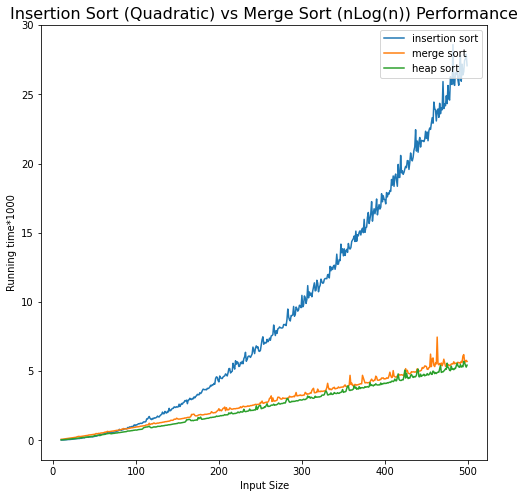

In [12]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(C[:,0],C[:,1],label = 'insertion sort')
plt.plot(C[:,0],C[:,2],label = 'merge sort')
plt.plot(C[:,0],C[:,3],label = 'heap sort')
plt.xlabel('Input Size')
plt.ylabel('Running time*1000')
plt.legend(loc="upper right")
plt.title('Insertion Sort (Quadratic) vs Merge Sort/Heap Sort (nLog(n)) Performance',fontsize=16)